# <div align = 'center'> Работа с API и загрузка данных из внешних источников. </div>

<div align='center'> <b><big> Преподаватель: Маргарян Ашот Араратович </big> </b> </div>


<div align='center'> <i> 08 сентября 2025 г. </i> </div>

## Материалы занятия

Материалы этого занятия доступны по QR-коду

<a href="http://qrcoder.ru" target="_blank"><img src="http://qrcoder.ru/code/?https%3A%2F%2Fgithub.com%2Fmarashot96%2FLections%2Fblob%2Fmain%2FAnalisysCMI%2FNavigator.md&8&0" width="360" height="360" border="0" title="QR код"></a>

---

## План занятия

- Познакомиться с `API` и методами запросов `Get` и `Post`.
- Разбор простых запросов без ключа доступа
- Сохранение данных в виде локальных файлов 
- Самостоятельная работа с простыми запросами
- Разбор сложных запросов с изучением документации и входных ключей
- Самостоятельные сложные запросы
---

## Что такое API и зачем оно нужно?


**Application Programming Interface** - это интерфейс взаимодействия между программами. Нам он необходим для сбора информации из различных источников.
    
## Ключевые понятия
- **REST API** - наиболее распространённый тип API, основанный на передаче данных по протоколу HTTP.
- **Endpoint** - конечная точка (URL), по которому выполняется запрос.
- **Методы запросов**:  
  - GET - получить данные.  
  - POST - отправить данные.
- **Форматы данных**: JSON, CSV, XML.
- **JSON (JavaScript Object Notation)** - основной формат, удобный для передачи структурированных данных.

## Зачем это нужно аналитикам?
- Автоматическая загрузка свежих данных (погода, курсы валют, статистика).
- Доступ к большим и регулярно обновляемым источникам.
- Возможность интеграции данных из разных сервисов.


## Извлечение данных с ресурса open-meteo.com

Данные на ресурсе open-meteo.com хранятся в отрытом доступе без дополнительной активации по api-ключу. Для полуения  информации достаточно указать следующие параметры: ширину и долготу той точки, в которой хотим взять данные о погоде (в формате `float`), начальное и конечное значение периода, которые нам необходимы (в формате `yyyy-mm-dd`), перечислить согласно следующей таблице те параметры, которые нам нужны:

| Параметр                       | Описание                                                   |
|--------------------------------|------------------------------------------------------------|
| `weathercode`                  | Код погодных условий                                       |
| `temperature_2m_max`           | Максимальная температура на высоте 2 м                     |
| `temperature_2m_min`           | Минимальная температура на высоте 2 м                      |
| `apparent_temperature_max`     | Максимальная «ощущаемая» температура                       |
| `apparent_temperature_min`     | Минимальная «ощущаемая» температура                        |
| `sunrise`                      | Время восхода солнца                                       |
| `sunset`                       | Время захода солнца                                        |
| `daylength`                    | Продолжительность светового дня                            |
| `shortwave_radiation_sum`      | Суммарная коротковолновая радиация                         |
| `uv_index_max`                 | Максимальный индекс УФ-излучения                           |
| `uv_index_clear_sky_max`       | Индекс УФ-излучения при чистом небе                        |
| `rain_sum`                     | Сумма осадков (дождь)                                      |
| `showers_sum`                  | Сумма осадков (ливни)                                      |
| `snowfall_sum`                 | Сумма осадков (снег)                                       |
| `precipitation_sum`            | Суммарные осадки                                           |
| `precipitation_hours`          | Количество часов с осадками                                |
| `precipitation_probability_max`| Максимальная вероятность осадков                           |
| `windspeed_10m_max`            | Максимальная скорость ветра на высоте 10 м                 |
| `windgusts_10m_max`            | Максимальные порывы ветра на высоте 10 м                   |
| `winddirection_10m_dominant`   | Доминирующее направление ветра на высоте 10 м              |
| `et0_fao_evapotranspiration`   | Эталонная испаряемость по FAO                              |

Дополнительные параметры

| Параметр                         | Описание                                                 |
|----------------------------------|----------------------------------------------------------|
| `temperature_2m_mean`            | Среднесуточная температура на высоте 2 м                 |
| `apparent_temperature_mean`      | Средняя «ощущаемая» температура                          |
| `mean_cape`, `max_cape`, `min_cape` | Индекс нестабильности атмосферы (CAPE)                 |
| `cloudcover_mean` / `max` / `min`| Облачность (средняя, максимальная, минимальная)          |
| `dewpoint_2m_mean` / `max` / `min` | Температура точки росы (средняя, макс., мин.)          |
| `reference_evapotranspiration_sum` | Суммарная испаряемость                                  |
| `growing_degree_days_0_50`       | Эффективные температурные дни (база 0–50 °C)             |
| `leaf_wetness_mean`              | Вероятность увлажнения листьев                           |
| `precipitation_probability_mean` / `min` | Средняя/минимальная вероятность осадков          |
| `relative_humidity_2m_mean` / `max` / `min` | Относительная влажность (средняя, макс., мин.) |
| `snowfall_water_equivalent_sum`  | Эквивалент воды в снегопаде                              |
| `pressure_msl_mean` / `max` / `min` | Давление на уровне моря                                |
| `surface_pressure_mean` / `max` / `min` | Поверхностное давление                               |
| `updraft_max`                    | Восходящие потоки (максимальные)                         |
| `visibility_mean` / `min` / `max`| Видимость (средняя, минимальная, максимальная)           |
| `windgusts_10m_mean` / `min`     | Средние/минимальные порывы ветра на высоте 10 м          |
| `windspeed_10m_mean` / `min`     | Средняя/минимальная скорость ветра на высоте 10 м        |
| `wet_bulb_temperature_2m_mean` / `max` / `min` | Влажная термометрическая температура             |
| `vapour_pressure_deficit_max`    | Максимальный дефицит парциального давления               |


**Пример:**
```python
latitude = 55.75   # Москва
longitude = 37.62
start_date = "2025-08-01"
end_date = "2025-08-26"
params = "temperature_2m_max,temperature_2m_min,temperature_2m_mean"
```

**Далее подгружаем эти данные в строку**
```python
url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily={params}&timezone=Europe/Moscow"
```

*Полную документацию api.open-meteo.com можно посмотреть [здесь]().*

На данном примере посмотрим, какие данные можно получить с ресурса open-meteo.com и поработаем с ними:

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, chi2, ttest_ind, pearsonr, spearmanr

# Параметры запроса
latitude = 55.75   # Москва
longitude = 37.62
start_date = "2025-08-20"
end_date = "2025-08-26"
params = "temperature_2m_max,temperature_2m_min,temperature_2m_mean"
chasp = "Europe/Moscow"
url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily={params}&timezone={chasp}"

# Запрос к API
response = requests.get(url)
data = response.json()
print(data)

{'latitude': 55.75, 'longitude': 37.625, 'generationtime_ms': 0.031828880310058594, 'utc_offset_seconds': 10800, 'timezone': 'Europe/Moscow', 'timezone_abbreviation': 'GMT+3', 'elevation': 152.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'temperature_2m_mean': '°C'}, 'daily': {'time': ['2025-08-20', '2025-08-21', '2025-08-22', '2025-08-23', '2025-08-24', '2025-08-25', '2025-08-26'], 'temperature_2m_max': [20.6, 17.7, 16.9, 14.9, 19.2, 15.3, 15.6], 'temperature_2m_min': [13.3, 12.7, 8.3, 10.4, 8.3, 9.6, 9.6], 'temperature_2m_mean': [17.2, 14.9, 13.1, 12.8, 13.8, 12.6, 12.2]}}


In [31]:
# Преобразуем в DataFrame
df = pd.DataFrame(data['daily'])
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
print(df)

            temperature_2m_max  temperature_2m_min  temperature_2m_mean
time                                                                   
2025-08-20                20.6                13.3                 17.2
2025-08-21                17.7                12.7                 14.9
2025-08-22                16.9                 8.3                 13.1
2025-08-23                14.9                10.4                 12.8
2025-08-24                19.2                 8.3                 13.8
2025-08-25                15.3                 9.6                 12.6
2025-08-26                15.6                 9.6                 12.2


In [32]:
# Основные показатели
mean_temp = df['temperature_2m_mean'].mean() # плохая метрика (средняя от среднего)
max_temp = df['temperature_2m_max'].max()
min_temp = df['temperature_2m_min'].min()

print('\n')
print("Максимальная температура за период:", max_temp)
print("Минимальная температура за период:", min_temp)



Максимальная температура за период: 20.6
Минимальная температура за период: 8.3


In [33]:
# Дополнительные показатели
# разница между максимальной и минимальной температуры по дням
df['temp_diff'] = df['temperature_2m_max'] - df['temperature_2m_min']
# изменение средней температуры по дням
df['temp_gradient'] = df['temperature_2m_mean'].diff()
# отклонение от средней температуры
df['temp_deviation'] = round(abs(df['temperature_2m_mean'] - mean_temp), 2)

print("\nРасширенные показатели по дням:")
print(df[['temperature_2m_max','temperature_2m_min','temperature_2m_mean','temp_diff','temp_gradient','temp_deviation']])



Расширенные показатели по дням:
            temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
time                                                                      
2025-08-20                20.6                13.3                 17.2   
2025-08-21                17.7                12.7                 14.9   
2025-08-22                16.9                 8.3                 13.1   
2025-08-23                14.9                10.4                 12.8   
2025-08-24                19.2                 8.3                 13.8   
2025-08-25                15.3                 9.6                 12.6   
2025-08-26                15.6                 9.6                 12.2   

            temp_diff  temp_gradient  temp_deviation  
time                                                  
2025-08-20        7.3            NaN             3.4  
2025-08-21        5.0           -2.3             1.1  
2025-08-22        8.6           -1.8             0.7  
2025-08-23      

<Figure size 1000x600 with 0 Axes>

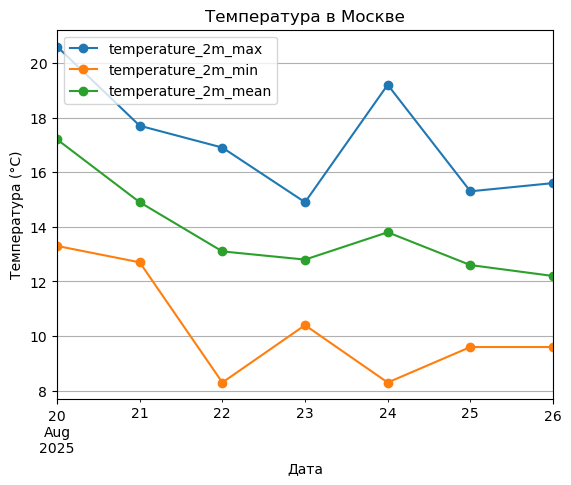

<Figure size 1000x600 with 0 Axes>

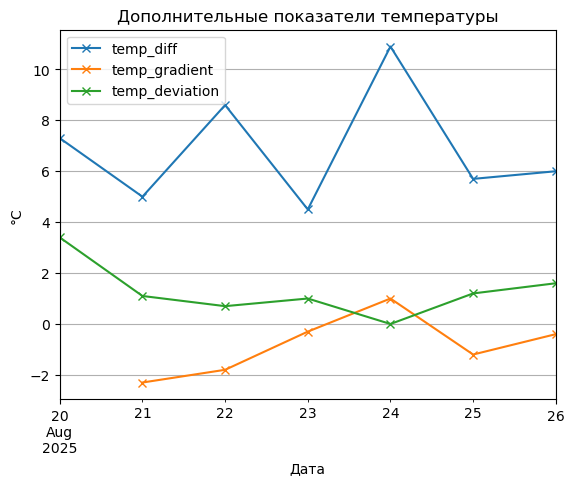

In [34]:
# Визуализация
plt.figure(figsize=(10,6))
df[['temperature_2m_max','temperature_2m_min','temperature_2m_mean']].plot(marker='o')
plt.title("Температура в Москве")
plt.ylabel("Температура (°C)")
plt.xlabel("Дата")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
df[['temp_diff','temp_gradient','temp_deviation']].plot(marker='x')
plt.title("Дополнительные показатели температуры")
plt.ylabel("°C")
plt.xlabel("Дата")
plt.grid(True)
plt.show()

In [16]:
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/simple/price"
params = {"ids": "bitcoin,ethereum,cronos,numeraire", "vs_currencies": "eur,usd,rub,gbp,jpy,chf,aud,cad"}
response = requests.get(url, params=params)
data = response.json()
print(data)

# Преобразуем в DataFrame
df = pd.DataFrame(data).T  # .T — транспонирует, чтобы валюты были по колонкам
df.index.name = "crypto"
df['EurUsd'] = df['eur']/df['usd']
df['RubUsd'] = df['rub']/df['usd']
print(df)

{'bitcoin': {'eur': 92902, 'usd': 108579, 'rub': 8675896, 'gbp': 80399, 'jpy': 15964886, 'chf': 86919, 'aud': 166073, 'cad': 149312}, 'cronos': {'eur': 9.163e-05, 'usd': 0.00010174, 'rub': 0.00670587, 'gbp': 8.386e-05, 'jpy': 0.01083468, 'chf': 9.963e-05, 'aud': 0.00014971, 'cad': 0.00013525}, 'ethereum': {'eur': 3718.44, 'usd': 4345.93, 'rub': 347257, 'gbp': 3218.01, 'jpy': 639003, 'chf': 3478.99, 'aud': 6647.18, 'cad': 5976.3}, 'numeraire': {'eur': 13.42, 'usd': 15.69, 'rub': 1253.41, 'gbp': 11.62, 'jpy': 2306.44, 'chf': 12.56, 'aud': 23.99, 'cad': 21.57}}
                    eur            usd           rub           gbp  \
crypto                                                               
bitcoin    92902.000000  108579.000000  8.675896e+06  80399.000000   
cronos         0.000092       0.000102  6.705870e-03      0.000084   
ethereum    3718.440000    4345.930000  3.472570e+05   3218.010000   
numeraire     13.420000      15.690000  1.253410e+03     11.620000   

              

## Самостоятельная работа

Задание 1. Извлечь с ресурса open-meteo.com данные о температуре воздуха за 01-07 сентября 2025 г. над вашим домом (геоданные можно узнать в любом доступном приложении) и с их помощью посчитать следующие значения в разрезе каждого дня:

- среднее между максимальной и минимальной температурой
- разность по модулю между средней температурой за день и усредней температурой


Вывести все эти значения в виде DataFrame.

import requests
import pandas as pd
import time

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GPV&apikey=demo'
r = requests.get(url)
data = r.json()
print(data)


In [ ]:
API_KEY = "8CL4893T6EW62CTZ"  # ← сюда вставь ключ Alpha Vantage
TICKERS = ["IBM", "GPV", "SHOP", "TSCO"]  # список тикеров
BASE_URL = "https://www.alphavantage.co/query"

def fetch_daily_series(symbol, api_key=API_KEY):
    """Загрузка дневных цен акций"""
    params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": symbol,
        "outputsize": "full",   # full = вся история, compact = последние 100
        "apikey": api_key
    }
    
    
    if not data:
        print(f"⚠ Нет данных для {symbol}")
        return None
    
    
    df = pd.DataFrame.from_dict(data, orient="index").astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.rename(columns={
        "1. open": "open",
        "2. high": "high",
        "3. low": "low",
        "4. close": "close",
        "5. adjusted close": "adj_close",
        "6. volume": "volume"
    })
    df["symbol"] = symbol
    return df

# собираем данные для всех тикеров
all_data = []
for ticker in TICKERS:
    df_ticker = fetch_daily_series(ticker)
    if df_ticker is not None:
        all_data.append(df_ticker)
    time.sleep(12)  # ограничение API: 5 запросов/минуту

# объединяем в один большой DataFrame
df_big = pd.concat(all_data)
df_big = df_big.reset_index().rename(columns={"index": "date"})

print(df_big.head())
print(df_big.tail())

# пример: сводная таблица "дата × тикер → цена закрытия"
df_pivot = df_big.pivot(index="date", columns="symbol", values="adj_close")
print(df_pivot.tail())

In [38]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=IBM&apikey=demo'
r = requests.get(url)
data = r.json()

print(data)


{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'IBM', '3. Last Refreshed': '2025-09-05', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-09-05': {'1. open': '248.23', '2. high': '249.03', '3. low': '245.45', '4. close': '248.53', '5. adjusted close': '248.53', '6. volume': '3147478', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2025-09-04': {'1. open': '245.42', '2. high': '249.28', '3. low': '242.85', '4. close': '247.18', '5. adjusted close': '247.18', '6. volume': '4765087', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2025-09-03': {'1. open': '240.02', '2. high': '244.25', '3. low': '239.41', '4. close': '244.1', '5. adjusted close': '244.1', '6. volume': '3156289', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2025-09-02': {'1. open': '240.9', '2. high': '241.55', '3. low': '238.25', '4. close': '241.5', '5. adjusted close': '241.

In [45]:
df = pd.DataFrame(data['Time Series (Daily)']).T

In [44]:
df.head

,2025-09-05,2025-09-04,2025-09-03,2025-09-02,2025-08-29,2025-08-28,2025-08-27,2025-08-26,2025-08-25,2025-08-22,...,2025-04-28,2025-04-25,2025-04-24,2025-04-23,2025-04-22,2025-04-21,2025-04-17,2025-04-16,2025-04-15,2025-04-14
1. open,248.23,245.42,240.02,240.9,245.23,245.43,242.87,241.02,242.565,240.74,...,232.86,228.95,231.175,246.0,238.5,238.065,239.68,240.28,239.55,239.77
2. high,249.03,249.28,244.25,241.55,245.4599,245.88,245.96,244.98,242.565,243.68,...,236.63,233.36,232.78,249.34,242.64,240.805,241.775,243.2999,241.53,241.77
3. low,245.45,242.85,239.41,238.25,241.72,243.36,242.0,240.38,239.43,240.22,...,232.07,226.32,224.4401,243.66,238.02,232.93,237.4,235.89,238.27,236.73
4. close,248.53,247.18,244.1,241.5,243.49,245.73,244.84,242.63,239.43,242.09,...,236.16,232.41,229.33,245.48,240.9,236.22,238.81,238.57,240.7,239.06
5. adjusted close,248.53,247.18,244.1,241.5,243.49,245.73,244.84,242.63,239.43,242.09,...,232.963109243697,229.263872879945,226.225566746516,242.156944686411,237.638944007481,233.022297025517,235.577236274083,235.340485146803,237.441651401414,235.823852031666
